# Color quantization

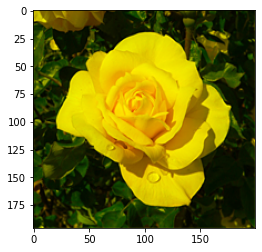

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("../Data/blomma.png")

flower = img[:,:, [2, 1, 0]] ## Converts BGR to RGB

plt.imshow(flower)

(318, 425, 3)


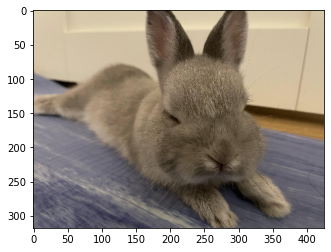

In [21]:
img = cv2.imread("../Data/bella.jpeg")
rabbit = img[:,:, [2,1,0]]

## Make img smaller
resize_factor = 0.3
height = rabbit.shape[0]
width = rabbit.shape[1]
rabbit = cv2.resize(rabbit, (int(width * resize_factor), int(height * resize_factor)))
print(rabbit.shape)
plt.imshow(rabbit)

## Color quantization

(39200, 3)
Values before scaling 0 255
Cluster centers [[0.05405588 0.09375522 0.        ]
 [0.90811259 0.80601949 0.        ]
 [0.56688228 0.44203987 0.        ]
 [0.20692176 0.2726526  0.        ]]


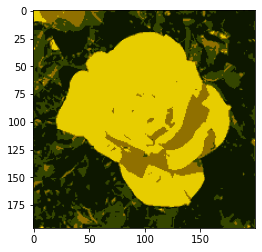

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X_flower = flower.reshape(-1, 3)
print(X_flower.shape)

print("Values before scaling", X_flower.min(), X_flower.max())
scaler = MinMaxScaler()

scaled_X_flower = scaler.fit_transform(X_flower)
kmeans = KMeans(4)
kmeans.fit(scaled_X_flower)

print("Cluster centers", kmeans.cluster_centers_)

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_flower = quantized_color_space.reshape(flower.shape)
plt.imshow(quantized_flower)

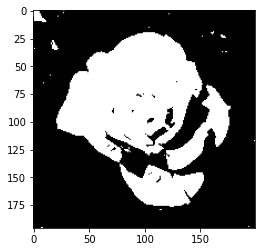

In [47]:
mask = quantized_flower[:,:,1] > .75
plt.imshow(mask, cmap="gray")

(-0.5, 199.5, 195.5, -0.5)

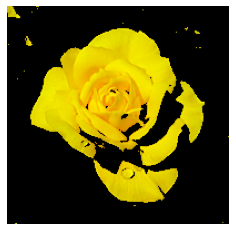

In [48]:
segmented_flower = mask[:,:, None] * flower
plt.imshow(segmented_flower)
plt.axis("off")

## Reducing colors

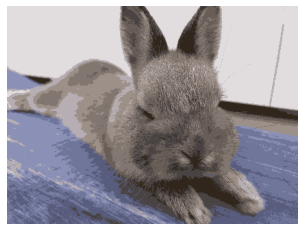

In [53]:
X_raddit = rabbit.reshape(-1, 3)
scaled_X_rabbit = scaler.fit_transform(X_raddit)

kmeans = KMeans(10)
kmeans.fit(scaled_X_rabbit)

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_rabbit = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized_rabbit);
plt.axis("off")
plt.savefig("fin_kanin.png")